# Preprocessing Notebook

## 1. Préparation initiale

### Lecture des données

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pd.options.display.max_columns = None
pd.options.display.max_rows = None

file_path = 'data/tgv_data.csv'

df = pd.read_csv(file_path, sep=';')
df.head()

,date,service,gare_depart,gare_arrivee,duree_moyenne,nb_train_prevu,nb_annulation,commentaire_annulation,nb_train_depart_retard,retard_moyen_depart,retard_moyen_tous_trains_depart,commentaire_retards_depart,nb_train_retard_arrivee,retard_moyen_arrivee,retard_moyen_tous_trains_arrivee,commentaires_retard_arrivee,nb_train_retard_sup_15,retard_moyen_trains_retard_sup15,nb_train_retard_sup_30,nb_train_retard_sup_60,prct_cause_externe,prct_cause_infra,prct_cause_gestion_trafic,prct_cause_materiel_roulant,prct_cause_gestion_gare,prct_cause_prise_en_charge_voyageurs
0,2018-01,National,BORDEAUX ST JEAN,PARIS MONTPARNASSE,141,870,5,NaN,289,11.247809,3.693179,NaN,147,28.436735,6.511118,NaN,110,6.511118,44,8,36.134454,31.092437,10.924370,15.966387,5.042017,0.840336
1,2018-01,National,LA ROCHELLE VILLE,PARIS MONTPARNASSE,165,222,0,NaN,8,2.875000,0.095796,NaN,34,21.524020,5.696096,NaN,22,5.696096,5,0,15.384615,30.769231,38.461538,11.538462,3.846154,0.000000
2,2018-01,National,PARIS MONTPARNASSE,QUIMPER,220,248,1,NaN,37,9.501351,1.003981,NaN,26,55.692308,7.578947,"Ce mois-ci, l'OD a été touchée par les inciden...",26,7.548387,17,7,26.923077,38.461538,15.384615,19.230769,0.000000,0.000000
3,2018-01,National,PARIS MONTPARNASSE,ST MALO,156,102,0,NaN,12,19.912500,1.966667,NaN,13,48.623077,6.790686,"Ce mois-ci, l'OD a été touchée par les inciden...",8,6.724757,6,4,23.076923,46.153846,7.692308,15.384615,7.692308,0.000000
4,2018-01,National,PARIS MONTPARNASSE,ST PIERRE DES CORPS,61,391,2,NaN,61,7.796995,0.886889,NaN,71,12.405164,3.346487,NaN,17,3.346487,6,0,21.212121,42.424242,9.090909,21.212121,6.060606,0.000000


### Suppression des colonnes inutiles

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8154 entries, 0 to 8153
Data columns (total 26 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  8154 non-null   object 
 1   service                               8154 non-null   object 
 2   gare_depart                           8154 non-null   object 
 3   gare_arrivee                          8154 non-null   object 
 4   duree_moyenne                         8154 non-null   int64  
 5   nb_train_prevu                        8154 non-null   int64  
 6   nb_annulation                         8154 non-null   int64  
 7   commentaire_annulation                0 non-null      float64
 8   nb_train_depart_retard                8154 non-null   int64  
 9   retard_moyen_depart                   8154 non-null   float64
 10  retard_moyen_tous_trains_depart       8154 non-null   float64
 11  commentaire_retar

In [3]:
# Supprimer les colonnes vides ou partiellement remplies
df = df.drop(columns=['commentaire_annulation', 'commentaire_retards_depart', 'commentaires_retard_arrivee'])

## 2. Gestion des Dates Manquantes

In [4]:
# Identifier les trajets pour lesquels nous n'avons pas 66 dates
df.groupby(['gare_depart', 'gare_arrivee']).size().reset_index(name='count').query('count < 66')


,gare_depart,gare_arrivee,count
10,BORDEAUX ST JEAN,PARIS VAUGIRARD,12
11,BORDEAUX ST JEAN,TOURCOING,64
36,MADRID,MARSEILLE ST CHARLES,45
41,MARSEILLE ST CHARLES,MADRID,45
44,MARSEILLE ST CHARLES,TOURCOING,65
51,NANTES,PARIS VAUGIRARD,12
85,PARIS LYON,ZURICH,65
106,PARIS VAUGIRARD,BORDEAUX ST JEAN,12
107,PARIS VAUGIRARD,NANTES,12
108,PARIS VAUGIRARD,RENNES,12


### Cas de la gare Paris Vaugirard

In [5]:
df_vaugirard = df[(df['gare_arrivee'] == 'PARIS VAUGIRARD') | (df['gare_depart'] == 'PARIS VAUGIRARD')]
df_vaugirard.groupby(['gare_depart', 'gare_arrivee']).size()

gare_depart       gare_arrivee    
BORDEAUX ST JEAN  PARIS VAUGIRARD     12
NANTES            PARIS VAUGIRARD     12
PARIS VAUGIRARD   BORDEAUX ST JEAN    12
                  NANTES              12
                  RENNES              12
RENNES            PARIS VAUGIRARD     12
dtype: int64

In [6]:
df_vaugirard_bordeaux = df[(df['gare_depart'] == 'PARIS VAUGIRARD') & (df['gare_arrivee'] == 'BORDEAUX ST JEAN')]
df_vaugirard_bordeaux

,date,service,gare_depart,gare_arrivee,duree_moyenne,nb_train_prevu,nb_annulation,nb_train_depart_retard,retard_moyen_depart,retard_moyen_tous_trains_depart,nb_train_retard_arrivee,retard_moyen_arrivee,retard_moyen_tous_trains_arrivee,nb_train_retard_sup_15,retard_moyen_trains_retard_sup15,nb_train_retard_sup_30,nb_train_retard_sup_60,prct_cause_externe,prct_cause_infra,prct_cause_gestion_trafic,prct_cause_materiel_roulant,prct_cause_gestion_gare,prct_cause_prise_en_charge_voyageurs
113,2018-01,National,PARIS VAUGIRARD,BORDEAUX ST JEAN,165,63,1,12,22.318056,3.893280,5,44.550000,3.429570,4,3.429570,3,1,60.000000,0.000000,0.000000,40.000000,0.000000,0.0
196,2018-02,National,PARIS VAUGIRARD,BORDEAUX ST JEAN,164,54,1,10,30.161667,5.247799,11,49.213636,10.193082,10,10.193082,8,3,50.000000,0.000000,0.000000,40.000000,0.000000,10.0
372,2018-03,National,PARIS VAUGIRARD,BORDEAUX ST JEAN,165,55,0,5,27.023333,1.911515,6,36.516667,4.158788,3,4.158788,3,2,60.000000,20.000000,0.000000,20.000000,0.000000,0.0
505,2018-04,National,PARIS VAUGIRARD,BORDEAUX ST JEAN,165,57,15,4,6.733333,0.099603,2,17.300000,-0.160714,1,-0.160714,0,0,0.000000,0.000000,0.000000,100.000000,0.000000,0.0
633,2018-05,National,PARIS VAUGIRARD,BORDEAUX ST JEAN,165,36,3,4,30.520833,3.434343,4,36.262500,5.340909,4,5.340909,2,0,0.000000,0.000000,25.000000,75.000000,0.000000,0.0
714,2018-06,National,PARIS VAUGIRARD,BORDEAUX ST JEAN,165,58,0,4,33.341667,2.030747,4,34.212500,3.596552,4,3.596552,2,0,0.000000,50.000000,0.000000,50.000000,0.000000,0.0
820,2018-07,National,PARIS VAUGIRARD,BORDEAUX ST JEAN,169,59,0,15,29.783333,7.173164,13,40.669231,9.612147,11,9.612147,5,3,15.384615,23.076923,30.769231,15.384615,15.384615,0.0
950,2018-08,National,PARIS VAUGIRARD,BORDEAUX ST JEAN,169,56,0,6,43.025000,4.182440,9,34.424074,5.372024,7,5.372024,5,2,11.111111,22.222222,22.222222,44.444444,0.000000,0.0
1151,2018-09,National,PARIS VAUGIRARD,BORDEAUX ST JEAN,169,53,0,8,6.766667,0.544025,3,15.977778,1.061950,1,1.061950,0,0,0.000000,33.333333,0.000000,66.666667,0.000000,0.0
1215,2018-10,National,PARIS VAUGIRARD,BORDEAUX ST JEAN,170,56,0,5,2.030000,-0.308036,2,10.158333,0.406548,0,0.406548,0,0,0.000000,50.000000,50.000000,0.000000,0.000000,0.0


Tous les trajets qui impliquent la gare PARIS VAUGIRARD n'ont lieu qu'en 2018. Plus aucun trajet ensuite. On peut donc supprimer ces lignes du df.

In [7]:
df = df[(df['gare_depart'] != 'PARIS VAUGIRARD') & (df['gare_arrivee'] != 'PARIS VAUGIRARD')]

### Cas du trajet Tourcoing -> Marseille et de la ligne Madrid <-> Marseille

In [8]:
df_tourcoingmarseille = df[(df['gare_depart'] == 'TOURCOING') & (df['gare_arrivee'] == 'MARSEILLE ST CHARLES')]
df_tourcoingmarseille

,date,service,gare_depart,gare_arrivee,duree_moyenne,nb_train_prevu,nb_annulation,nb_train_depart_retard,retard_moyen_depart,retard_moyen_tous_trains_depart,nb_train_retard_arrivee,retard_moyen_arrivee,retard_moyen_tous_trains_arrivee,nb_train_retard_sup_15,retard_moyen_trains_retard_sup15,nb_train_retard_sup_30,nb_train_retard_sup_60,prct_cause_externe,prct_cause_infra,prct_cause_gestion_trafic,prct_cause_materiel_roulant,prct_cause_gestion_gare,prct_cause_prise_en_charge_voyageurs
45,2018-01,National,TOURCOING,MARSEILLE ST CHARLES,309,31,1,0,0.000,0.000000,1,58.883333,2.345000,1,2.345000,1,0,100.000000,0.000000,0.000000,0.000000,0.0,0.0
143,2018-02,National,TOURCOING,MARSEILLE ST CHARLES,309,28,1,2,26.000,1.925926,6,25.430556,6.322222,6,6.322222,1,0,0.000000,40.000000,60.000000,0.000000,0.0,0.0
352,2018-03,National,TOURCOING,MARSEILLE ST CHARLES,309,31,0,2,3.000,0.193548,3,31.888889,4.148387,3,4.148387,1,0,50.000000,0.000000,50.000000,0.000000,0.0,0.0
434,2018-04,National,TOURCOING,MARSEILLE ST CHARLES,309,26,8,5,2.800,0.777778,1,22.916667,2.112963,1,2.112963,0,0,0.000000,0.000000,100.000000,0.000000,0.0,0.0
635,2018-05,National,TOURCOING,MARSEILLE ST CHARLES,309,19,3,0,0.000,0.000000,0,0.000000,0.000000,0,1.264583,0,0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
693,2018-06,National,TOURCOING,MARSEILLE ST CHARLES,309,19,1,0,1.000,0.722222,2,28.775000,3.488889,2,3.488889,1,0,0.000000,50.000000,50.000000,0.000000,0.0,0.0
894,2018-07,National,TOURCOING,MARSEILLE ST CHARLES,305,28,0,8,10.875,3.107143,7,38.761905,11.322619,7,11.322619,5,1,28.571429,28.571429,28.571429,14.285714,0.0,0.0
974,2018-08,National,TOURCOING,MARSEILLE ST CHARLES,304,27,0,6,6.575,1.461111,2,21.325000,3.879630,2,3.879630,0,0,0.000000,0.000000,100.000000,0.000000,0.0,0.0
1124,2018-09,National,TOURCOING,MARSEILLE ST CHARLES,304,30,0,2,93.000,6.200000,5,76.983333,13.978889,5,13.978889,4,1,0.000000,40.000000,40.000000,20.000000,0.0,0.0
1260,2018-10,National,TOURCOING,MARSEILLE ST CHARLES,305,28,0,1,5.000,0.178571,0,0.000000,1.929167,0,1.929167,0,0,0.000000,0.000000,0.000000,0.000000,0.0,0.0


In [9]:
df_tourcoingmarseille = df[(df['gare_depart'] == 'TOURCOING') & (df['gare_arrivee'] == 'MARSEILLE ST CHARLES')]

# Filter le DataFrame
df = df[~((df['gare_depart'] == 'TOURCOING') & (df['gare_arrivee'] == 'MARSEILLE ST CHARLES'))]


<ipython-input-10-b5f8d161cb9c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['date'] = pd.to_datetime(filtered_df['date'], format='%Y-%m')


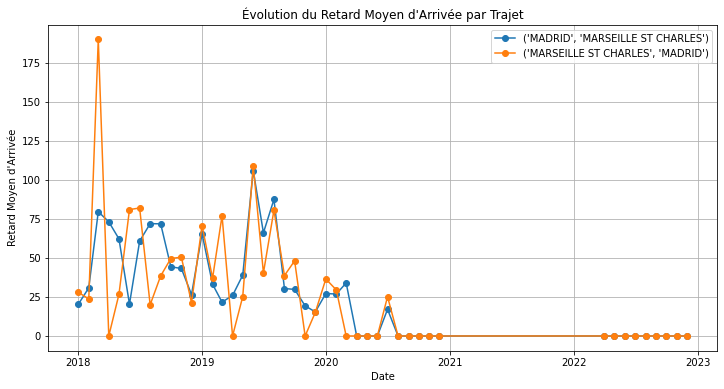

In [10]:
trajets = [
    ('MADRID', 'MARSEILLE ST CHARLES'),
    ('MARSEILLE ST CHARLES', 'MADRID')
]

filtered_df = df[df[['gare_depart', 'gare_arrivee']].apply(tuple, axis=1).isin(trajets)]

filtered_df['date'] = pd.to_datetime(filtered_df['date'], format='%Y-%m')

grouped = filtered_df.groupby(['gare_depart', 'gare_arrivee', 'date'])['retard_moyen_arrivee'].mean()

plt.figure(figsize=(12, 6))

for trajet, data in grouped.groupby(['gare_depart', 'gare_arrivee']):
    plt.plot(data.index.get_level_values('date'), data.values, marker='o', linestyle='-', label=trajet)

plt.title('Évolution du Retard Moyen d\'Arrivée par Trajet')
plt.xlabel('Date')
plt.ylabel('Retard Moyen d\'Arrivée')
plt.legend()
plt.grid(True)
plt.show()


In [11]:
df = df[~((df['gare_depart'] == 'MADRID') & (df['gare_arrivee'] == 'MARSEILLE ST CHARLES') | ((df['gare_depart'] == 'MARSEILLE ST CHARLES') & (df['gare_arrivee'] == 'MADRID')))]

### Cas des trajets pour lesquels il manque très peu de dates -> Imputation automatique avec la moyenne du voisinage

In [12]:
# liste des combinaisons uniques de gares de départ et d'arrivée dans le DataFrame
trajets = df[['gare_depart', 'gare_arrivee']].drop_duplicates()

# Liste des dates attendues
dates_attendues = [f"{year}-{month:02d}" for year in range(2018, 2023) for month in range(1, 13)]
dates_attendues += ["2023-01", "2023-02", "2023-03", "2023-04", "2023-05", "2023-06"]

for index, trajet in trajets.iterrows():
    gare_depart = trajet['gare_depart']
    gare_arrivee = trajet['gare_arrivee']
    
    for date in dates_attendues:
        if not df[(df['gare_depart'] == gare_depart) & (df['gare_arrivee'] == gare_arrivee) & (df['date'] == date)].empty:
            continue

        previous_dates = [d for d in dates_attendues if d < date][:3]
        next_dates = [d for d in dates_attendues if d > date][:3]

        previous_rows = df[(df['gare_depart'] == gare_depart) & (df['gare_arrivee'] == gare_arrivee) & df['date'].isin(previous_dates)]
        next_rows = df[(df['gare_depart'] == gare_depart) & (df['gare_arrivee'] == gare_arrivee) & df['date'].isin(next_dates)]

        mean_values = (previous_rows.mean() + next_rows.mean()) / 2
        mean_values['date'] = date
        service = df.loc[(df['gare_depart'] == gare_depart) & (df['gare_arrivee'] == gare_arrivee) & (df['date'] == previous_dates[0]), 'service'].values[0]

        new_row = {col: mean_values[col] for col in mean_values.index}
        new_row['service'] = service
        new_row['gare_depart'] = gare_depart
        new_row['gare_arrivee'] = gare_arrivee

        df = df.append(new_row, ignore_index=True)

        print(f"Nouvelle ligne ajoutée : {new_row}")


Nouvelle ligne ajoutée : {'duree_moyenne': 309.33333333333337, 'nb_train_prevu': 30.166666666666668, 'nb_annulation': 1.5, 'nb_train_depart_retard': 9.833333333333334, 'retard_moyen_depart': 7.6362755763653265, 'retard_moyen_tous_trains_depart': 2.4824698404377106, 'nb_train_retard_arrivee': 3.8333333333333335, 'retard_moyen_arrivee': 43.83888888833334, 'retard_moyen_tous_trains_arrivee': 8.887343480159661, 'nb_train_retard_sup_15': 3.8333333333333335, 'retard_moyen_trains_retard_sup15': 23.48266769, 'nb_train_retard_sup_30': 2.1666666666666665, 'nb_train_retard_sup_60': 1.3333333333333333, 'prct_cause_externe': 11.666666666666668, 'prct_cause_infra': 17.777777776666667, 'prct_cause_gestion_trafic': 25.555555556666665, 'prct_cause_materiel_roulant': 25.0, 'prct_cause_gestion_gare': 3.3333333333333335, 'prct_cause_prise_en_charge_voyageurs': 0.0, 'date': '2021-04', 'service': 'National', 'gare_depart': 'BORDEAUX ST JEAN', 'gare_arrivee': 'TOURCOING'}
Nouvelle ligne ajoutée : {'duree_moy

## 3. Gestion des Mois Sans Trains

### Imputation par la moyenne des mois disponibles sur les autres années

In [13]:
zero_train = df[(df['nb_train_prevu'] == 0)]
zero_train.shape

(57, 23)

<ipython-input-14-731761ea0a6d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['date'] = pd.to_datetime(filtered_df['date'], format='%Y-%m')


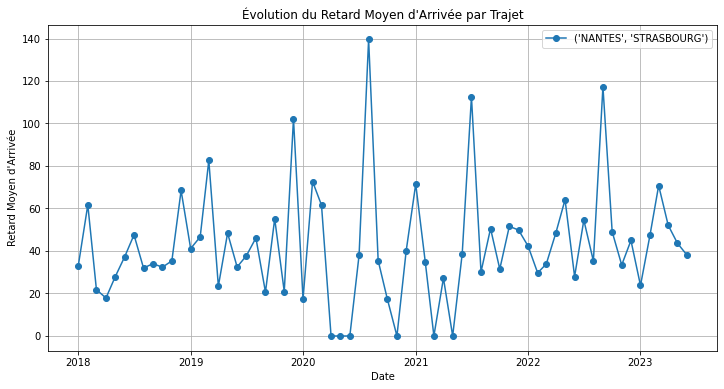

In [14]:
# Liste des trajets d'intérêt
trajets = [
    ('NANTES', 'STRASBOURG')
]

filtered_df = df[df[['gare_depart', 'gare_arrivee']].apply(tuple, axis=1).isin(trajets)]

filtered_df['date'] = pd.to_datetime(filtered_df['date'], format='%Y-%m')

grouped = filtered_df.groupby(['gare_depart', 'gare_arrivee', 'date'])['retard_moyen_arrivee'].mean()

plt.figure(figsize=(12, 6))

for trajet, data in grouped.groupby(['gare_depart', 'gare_arrivee']):
    plt.plot(data.index.get_level_values('date'), data.values, marker='o', linestyle='-', label=trajet)

plt.title('Évolution du Retard Moyen d\'Arrivée par Trajet')
plt.xlabel('Date')
plt.ylabel('Retard Moyen d\'Arrivée')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
nb_lignes_modifiees = 0

trajets = df[['gare_depart', 'gare_arrivee']].drop_duplicates()
dates_attendues = [f"{year}-{month:02d}" for year in range(2018, 2023) for month in range(1, 13)]
dates_attendues += ["2023-01", "2023-02", "2023-03", "2023-04", "2023-05", "2023-06"]

# Colonnes numériques à mettre à jour
update_columns = ['duree_moyenne', 'nb_train_prevu', 'nb_annulation', 'nb_train_depart_retard', 'retard_moyen_depart', 'retard_moyen_tous_trains_depart',
                  'nb_train_retard_arrivee', 'retard_moyen_arrivee', 'retard_moyen_tous_trains_arrivee', 'nb_train_retard_sup_15', 'retard_moyen_trains_retard_sup15',
                  'nb_train_retard_sup_30', 'nb_train_retard_sup_60', 'prct_cause_externe', 'prct_cause_infra', 'prct_cause_gestion_trafic',
                  'prct_cause_materiel_roulant', 'prct_cause_gestion_gare', 'prct_cause_prise_en_charge_voyageurs']

for index, trajet in trajets.iterrows():
    gare_depart = trajet['gare_depart']
    gare_arrivee = trajet['gare_arrivee']
    
    for date in dates_attendues:

        # Vérifier si 'nb_train_prevu' est égal à zéro pour la date actuelle
        if df[(df['gare_depart'] == gare_depart) & (df['gare_arrivee'] == gare_arrivee) & (df['date'] == date)]['nb_train_prevu'].values[0] == 0:
            # Calcul des nouvelles valeurs pour les colonnes numériques
            other_years_data = df[(df['gare_depart'] == gare_depart) & (df['gare_arrivee'] == gare_arrivee) & (df['date'].str[-2:] == date[-2:]) & (df['date'].str[:4] != date[:4])]
            if not other_years_data.empty:
                mean_values = other_years_data.mean()
                mean_values['date'] = date

                service = df.loc[(df['gare_depart'] == gare_depart) & (df['gare_arrivee'] == gare_arrivee) & (df['date'] == date), 'service'].values[0]
                mean_values['service'] = service

                for col in update_columns:
                    df.loc[(df['gare_depart'] == gare_depart) & (df['gare_arrivee'] == gare_arrivee) & (df['date'] == date), col] = mean_values[col]
                nb_lignes_modifiees += 1

print(f"Nombre total de lignes modifiées : {nb_lignes_modifiees}")


Nombre total de lignes modifiées : 57


## 4. Detection des valeurs erronnées

### Détection et correction des lignes pour lesquelles la somme des % des causes de retard est différente de 100%

In [16]:
prct_columns = [col for col in df.columns if col.startswith("prct_")]

invalid_rows = pd.DataFrame()
invalid_count_by_trajet = {}

for index, row in df.iterrows():
    sum_prct = sum(row[prct_columns])
    if abs(sum_prct - 100) > 2:
        trajet = (row['gare_depart'], row['gare_arrivee'])
        
        if trajet in invalid_count_by_trajet:
            invalid_count_by_trajet[trajet] += 1
        else:
            invalid_count_by_trajet[trajet] = 1
        
        invalid_data = {
            'date': row['date'],
            'gare_depart': row['gare_depart'],
            'gare_arrivee': row['gare_arrivee']
        }
        invalid_data.update({col: row[col] for col in prct_columns})
        
        invalid_rows = invalid_rows.append(invalid_data, ignore_index=True)

print("Nombre de lignes ne respectant pas le critère par trajet :")
for trajet, count in invalid_count_by_trajet.items():
    print(f"Trajet {trajet}: {count} lignes")

percentage_invalid = (len(invalid_rows) / len(df)) * 100

print(f"Pourcentage de lignes ne respectant pas le critère : {percentage_invalid:.2f}%")

Nombre de lignes ne respectant pas le critère par trajet :
Trajet ('MARSEILLE ST CHARLES', 'TOURCOING'): 7 lignes
Trajet ('PARIS EST', 'STUTTGART'): 11 lignes
Trajet ('PARIS LYON', 'ITALIE'): 4 lignes
Trajet ('ITALIE', 'PARIS LYON'): 4 lignes
Trajet ('PARIS LYON', 'LAUSANNE'): 7 lignes
Trajet ('LAUSANNE', 'PARIS LYON'): 5 lignes
Trajet ('BELLEGARDE (AIN)', 'PARIS LYON'): 1 lignes
Trajet ('STUTTGART', 'PARIS EST'): 8 lignes
Trajet ('ZURICH', 'PARIS LYON'): 6 lignes
Trajet ('PARIS LYON', 'GENEVE'): 4 lignes
Trajet ('PARIS EST', 'FRANCFORT'): 4 lignes
Trajet ('FRANCFORT', 'PARIS EST'): 5 lignes
Trajet ('GENEVE', 'PARIS LYON'): 4 lignes
Trajet ('BARCELONA', 'PARIS LYON'): 4 lignes
Trajet ('PARIS LYON', 'ZURICH'): 6 lignes
Trajet ('PARIS LYON', 'BARCELONA'): 25 lignes
Trajet ('TOURCOING', 'BORDEAUX ST JEAN'): 10 lignes
Trajet ('BORDEAUX ST JEAN', 'TOURCOING'): 11 lignes
Trajet ('STRASBOURG', 'NANTES'): 3 lignes
Trajet ('PARIS EST', 'NANCY'): 1 lignes
Trajet ('PARIS LYON', 'MARSEILLE ST CHAR

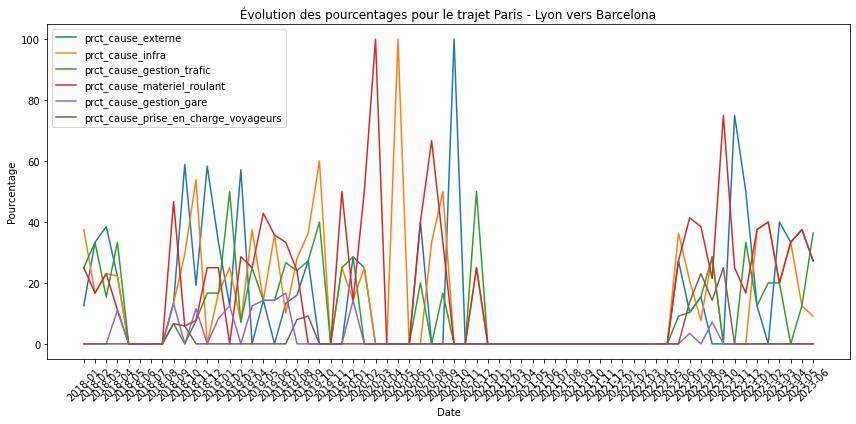

In [17]:
trajet_df = df[(df['gare_depart'] == 'PARIS LYON') & (df['gare_arrivee'] == 'BARCELONA')]

trajet_df = trajet_df.sort_values(by='date')

plt.figure(figsize=(12, 6))

for col in prct_columns:
    plt.plot(trajet_df['date'], trajet_df[col], label=col)

plt.xlabel('Date')
plt.ylabel('Pourcentage')
plt.title('Évolution des pourcentages pour le trajet Paris - Lyon vers Barcelona')
plt.legend(loc='upper left')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [18]:
prct_columns = [col for col in df.columns if col.startswith("prct_")]

mean_prct_by_trajet = {}

for index, row in df.iterrows():
    sum_prct = sum(row[prct_columns])
    if abs(sum_prct - 100) > 2:
        trajet = (row['gare_depart'], row['gare_arrivee'])
        
        if trajet not in mean_prct_by_trajet:
            valid_rows = df[(df['gare_depart'] == trajet[0]) & (df['gare_arrivee'] == trajet[1]) & ~(df.index.isin([index]))]
            mean_prct = valid_rows[prct_columns].mean()
            mean_prct_by_trajet[trajet] = mean_prct
            
        total_mean_prct = mean_prct_by_trajet[trajet].sum()
        normalized_mean_prct = (mean_prct_by_trajet[trajet] / total_mean_prct) * 100
        
        for col in prct_columns:
            df.at[index, col] = normalized_mean_prct[col]

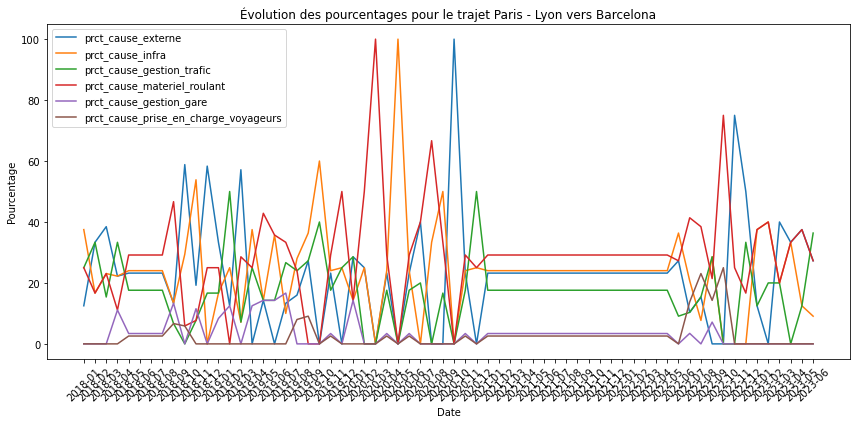

In [23]:
trajet_df = df[(df['gare_depart'] == 'PARIS LYON') & (df['gare_arrivee'] == 'BARCELONA')]

trajet_df = trajet_df.sort_values(by='date')

plt.figure(figsize=(12, 6))

for col in prct_columns:
    plt.plot(trajet_df['date'], trajet_df[col], label=col)

plt.xlabel('Date')
plt.ylabel('Pourcentage')
plt.title('Évolution des pourcentages pour le trajet Paris - Lyon vers Barcelona')
plt.legend(loc='upper left')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 5. Outliers

In [19]:
df.describe()

,duree_moyenne,nb_train_prevu,nb_annulation,nb_train_depart_retard,retard_moyen_depart,retard_moyen_tous_trains_depart,nb_train_retard_arrivee,retard_moyen_arrivee,retard_moyen_tous_trains_arrivee,nb_train_retard_sup_15,retard_moyen_trains_retard_sup15,nb_train_retard_sup_30,nb_train_retard_sup_60,prct_cause_externe,prct_cause_infra,prct_cause_gestion_trafic,prct_cause_materiel_roulant,prct_cause_gestion_gare,prct_cause_prise_en_charge_voyageurs
count,7986.000000,7986.000000,7986.000000,7986.000000,7986.000000,7986.000000,7986.000000,7986.000000,7986.000000,7986.000000,7986.000000,7986.000000,7986.000000,7986.000000,7986.000000,7986.000000,7986.000000,7986.000000,7986.000000
mean,170.233513,263.106645,11.667998,90.419593,11.331842,3.120164,35.293501,34.271100,5.698591,24.995237,32.831857,11.899958,4.338684,23.950407,22.526589,19.506211,19.631234,6.964675,7.420885
std,84.221536,171.377253,26.830206,90.380457,12.419699,5.467805,29.599325,15.028500,7.985924,21.322833,19.809843,11.217737,4.914763,16.122553,15.177334,14.251220,13.732945,7.990525,10.252619
min,35.000000,2.000000,0.000000,0.000000,0.000000,-229.269444,0.000000,-40.109259,-472.638889,0.000000,-2.404296,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,100.000000,148.000000,0.000000,24.000000,5.334491,1.189107,14.000000,24.953843,3.192083,10.000000,16.651751,4.000000,1.000000,12.903226,12.500000,10.000000,10.526316,0.000000,0.000000
50%,164.000000,224.500000,3.000000,58.000000,9.170000,2.290554,28.000000,32.664068,5.002338,20.000000,35.252500,9.000000,3.000000,21.621622,20.373944,17.647059,17.777778,5.405405,4.166667
75%,222.000000,339.000000,10.000000,131.000000,14.285498,3.933215,48.000000,41.412605,7.677865,34.000000,44.509377,16.000000,6.000000,32.432432,30.000000,26.923077,26.470588,10.000000,10.526316
max,786.000000,1075.000000,297.000000,596.000000,316.188095,84.516667,376.000000,299.600000,92.000000,312.000000,299.600000,202.000000,71.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [20]:
column_name = 'retard_moyen_arrivee'
n = 3

# Etape 1: Detecter les lignes avec outliers (<0)
outliers = df[df[column_name] < 0].sort_values(by=column_name, ascending=True)

num_lines_modified = 0

# Step 2: Calculer la moyenne des 3 valeurs précédentes et des 3 valeurs suivantes pour chaque ligne comportant des outliers
for index, row in outliers.iterrows():
    date = row['date']
    gare_depart = row['gare_depart']
    gare_arrivee = row['gare_arrivee']
    original_index = df[(df['date'] == date) & (df['gare_depart'] == gare_depart) & (df['gare_arrivee'] == gare_arrivee)].index[0]
    
    nb_train_retard_sup_15 = row['nb_train_retard_sup_15']
    retard_moyen_trains_retard_sup15 = row['retard_moyen_trains_retard_sup15']
    nb_train_retard_sup_30 = row['nb_train_retard_sup_30']
    nb_train_retard_sup_60 = row['nb_train_retard_sup_60']

    new_value = (nb_train_retard_sup_15 * retard_moyen_trains_retard_sup15 + 
                 nb_train_retard_sup_30 * 30 + 
                 nb_train_retard_sup_60 * 60) / (nb_train_retard_sup_15 + nb_train_retard_sup_30 + nb_train_retard_sup_60)
    
    df.at[original_index, column_name] = new_value
    
    num_lines_modified += 1

print(f"Number of lines modified: {num_lines_modified}")

Number of lines modified: 2


## 6. Creation nouvelle feature - durée strandard

In [21]:
df['difference'] = df['duree_moyenne'] - df['retard_moyen_tous_trains_arrivee']
df['duree_standard'] = df.groupby(['gare_depart', 'gare_arrivee'])['difference'].transform('median')
df['duree_standard'] = np.round(df['duree_standard'])

df.drop(columns=['difference'], inplace=True)

## 7. Enregistrer le nouveau dataset

In [22]:
# Sauvegarder le DataFrame prétraité dans un fichier CSV
df.to_csv("data/preprocessed_tgv_data.csv", index=False, sep=";")